<a href="https://colab.research.google.com/github/tensorvijay/Mtechcen/blob/master/NLP_FINAL_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/malayalam_news_train.csv',delimiter=',',encoding='utf_8_sig')
df.head()

,headings,label
0,കൊച്ചി ചെരുപ്പ് വിതരണ കേന്ദ്രത്തിലെ തീപിടിത്തം...,business
1,ഈ​​​സ്റ്റേ​​​ണ്‍ ക​​​റി പൗ​​​ഡ​​​റി​​​ന് പു​​​...,business
2,ശ്രീശാന്തിന്റെ ആജീവനാന്ത വിലക്ക് പിന്‍വലിച്ചു,sports
3,റയല്‍ മാഡ്രിഡിനെ ഞെട്ടിച്ച യുവതാരം ബ്രസീല്‍ ടീ...,sports
4,"എനിക്ക് ശ്രീനിവാസന്‍ ആകേണ്ട, ലോഹിതദാസ് മതി : ക...",entertainment


In [ ]:
df.head()

,headings,label
0,കൊച്ചി ചെരുപ്പ് വിതരണ കേന്ദ്രത്തിലെ തീപിടിത്തം...,business
1,ഈ​​​സ്റ്റേ​​​ണ്‍ ക​​​റി പൗ​​​ഡ​​​റി​​​ന് പു​​​...,business
2,ശ്രീശാന്തിന്റെ ആജീവനാന്ത വിലക്ക് പിന്‍വലിച്ചു,sports
3,റയല്‍ മാഡ്രിഡിനെ ഞെട്ടിച്ച യുവതാരം ബ്രസീല്‍ ടീ...,sports
4,"എനിക്ക് ശ്രീനിവാസന്‍ ആകേണ്ട, ലോഹിതദാസ് മതി : ക...",entertainment


In [ ]:
Y[0:10] #O business 1 entertainment 2 sports

array([[0],
       [0],
       [2],
       [2],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1]])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


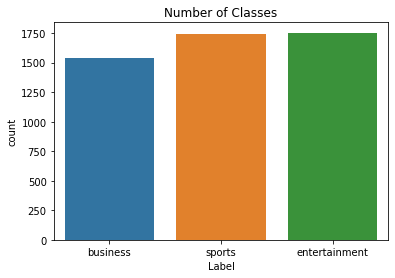

In [ ]:
img=sns.countplot(df.label)
plt.xlabel('Label')
plt.title('Number of Classes')
plt.savefig('Malayalam_news_count')

In [ ]:
img.figure.savefig('count_plot.png')

In [ ]:
X = df.headings
Y = df.label
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)
Y

array([[0],
       [0],
       [2],
       ...,
       [2],
       [1],
       [1]])

In [ ]:
X_=[]
for i in  X:
  X_.append(i.replace('\u200d',''))

In [ ]:
X_[9]

'\nഒടുവില് ടി വി ചന്ദ്രന് അയ്യപ്പനോടുള്ള വാക്ക് പാലിച്ചു\n                                            \n'

In [ ]:
X=np.asarray(X_)

In [ ]:
X_=[]
for i in X:
   X_.append((i.replace('\u200c','')))

In [ ]:
X=np.asarray(X_)

In [ ]:
X[13]

'ഐ എസ് എല് ആദ്യ സെമിയില് നോര്ത്ത് ഈസ്റ്റ് ഇന്നലെ ബാംഗളൂര് എഫ് സിയെ പരാജയപ്പെടുത്തി'

In [ ]:
df.head()

,headings,label
0,കൊച്ചി ചെരുപ്പ് വിതരണ കേന്ദ്രത്തിലെ തീപിടിത്തം...,business
1,ഈ​​​സ്റ്റേ​​​ണ്‍ ക​​​റി പൗ​​​ഡ​​​റി​​​ന് പു​​​...,business
2,ശ്രീശാന്തിന്റെ ആജീവനാന്ത വിലക്ക് പിന്‍വലിച്ചു,sports
3,റയല്‍ മാഡ്രിഡിനെ ഞെട്ടിച്ച യുവതാരം ബ്രസീല്‍ ടീ...,sports
4,"എനിക്ക് ശ്രീനിവാസന്‍ ആകേണ്ട, ലോഹിതദാസ് മതി : ക...",entertainment


In [ ]:
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size=0.15)

In [ ]:
Y.shape

(5036, 1)

In [ ]:
max_words = 1000
max_len = 150

In [ ]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [ ]:
tok.word_index

{'പുതിയ': 1,
 'ഇന്ത്യന്': 2,
 'പുറത്തുവിട്ടു': 3,
 'പോസ്റ്റര്': 4,
 'ഇന്ത്യ': 5,
 'വീണ്ടും': 6,
 'വീഡിയോ': 7,
 'ചിത്രം': 8,
 'ഒരു': 9,
 'ഇന്ന്': 10,
 'രൂപ': 11,
 'ഈ': 12,
 'താരം': 13,
 'ഇനി': 14,
 'ഐ': 15,
 'റിലീസ്': 16,
 'കോടി': 17,
 'പുറത്ത്': 18,
 'വില': 19,
 'ചെയ്തു': 20,
 'ആദ്യ': 21,
 'ഓഹരി': 22,
 'ചിത്രത്തിന്റെ': 23,
 'ജയം': 24,
 'സൂപ്പര്': 25,
 'വന്': 26,
 'രണ്ടാം': 27,
 'ടീം': 28,
 'ശേഷം': 29,
 'നടന്': 30,
 'ധോണി': 31,
 'ലീഗ്': 32,
 'നിന്ന്': 33,
 'എന്ന': 34,
 'ആ': 35,
 'സ്റ്റില്': 36,
 'നടി': 37,
 'ബാങ്ക്': 38,
 'ഏറ്റവും': 39,
 'സി': 40,
 'തുടക്കം': 41,
 'ഗാനം': 42,
 'കൂടി': 43,
 'പവന്': 44,
 'റണ്സ്': 45,
 'എസ്': 46,
 'ടീസര്': 47,
 'ഞാന്': 48,
 'എ': 49,
 'അവസാന': 50,
 'പരമ്ബര': 51,
 'മോഹന്ലാല്': 52,
 'ടീമില്': 53,
 'പി': 54,
 'പുറത്തിറങ്ങി': 55,
 'കോഹ്ലി': 56,
 'വൈറല്': 57,
 'ചിത്രങ്ങള്': 58,
 'തന്നെ': 59,
 'പ്രിയ': 60,
 'രണ്ട്': 61,
 'എന്ന്': 62,
 'എഫ്': 63,
 'തകര്പ്പന്': 64,
 'വലിയ': 65,
 'വാര്യര്': 66,
 'ഏകദിനം': 67,
 'ക്രിക്കറ്റ്': 68,
 'നേട്ടം': 69,
 'സ്വര്ണവില': 70,
 'വി

In [ ]:
sequences_matrix

array([[  0,   0,   0, ..., 740,   7,  57],
       [  0,   0,   0, ..., 123, 119, 865],
       [  0,   0,   0, ..., 369, 626, 180],
       ...,
       [  0,   0,   0, ...,   0,   0, 653],
       [  0,   0,   0, ...,   0,   0, 514],
       [  0,   0,   0, ...,   2,  68, 187]], dtype=int32)

In [ ]:
sequences

[[740, 7, 57],
 [331, 272, 530, 531, 123, 119, 865],
 [741, 229, 369, 626, 180],
 [52],
 [627, 181],
 [135, 8, 47, 80, 16, 149],
 [332, 230, 64, 370, 170, 742, 136, 97],
 [273],
 [628, 29, 274, 157],
 [],
 [22, 71, 86, 69, 87, 137, 532, 333, 137, 197, 138],
 [],
 [5, 474, 371],
 [58, 372, 103],
 [866, 301, 867, 275, 9, 93, 17, 11],
 [158, 8, 868, 533],
 [],
 [417, 124, 869, 870, 373, 98],
 [629, 871, 475, 476, 477, 249, 30, 418, 334],
 [276, 7, 18],
 [872, 99, 4, 18, 277],
 [88, 534],
 [373, 181, 419],
 [535, 104, 1, 42],
 [97, 2, 302, 100, 103],
 [15, 40, 15, 40, 15, 38, 159, 40, 77, 743, 374, 40, 231],
 [873, 303, 744, 112, 874, 160, 125],
 [375, 35, 182, 24, 420, 43, 478],
 [26, 112, 171, 5],
 [745, 875, 876],
 [250, 1, 877, 8, 47],
 [],
 [746, 27, 479, 9, 161, 198, 81],
 [213, 251, 376, 8, 57],
 [107],
 [304, 108, 126, 162, 370, 878],
 [747, 183, 184, 421, 480],
 [29, 879, 127, 868, 377, 748],
 [25, 13, 536, 163],
 [5, 123, 537],
 [481],
 [48, 232, 378, 66],
 [],
 [14, 630, 880],
 

In [ ]:
sequences_matrix.shape

(4280, 150)

In [ ]:
Y_train.shape

(4280, 1)

In [ ]:
model = RNN()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 150, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 3)                

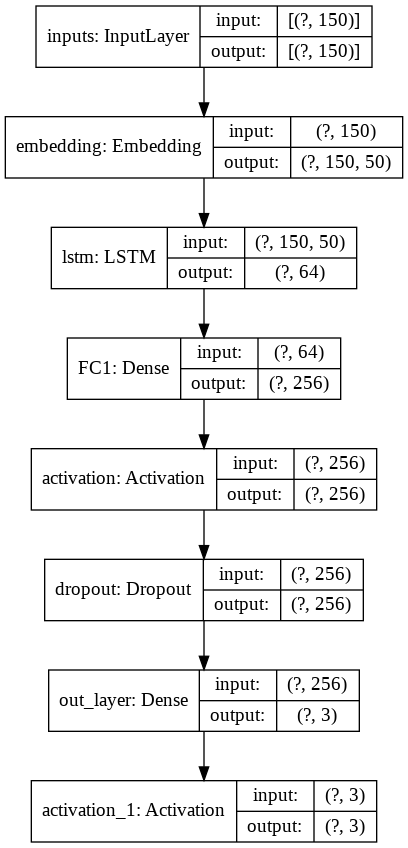

In [ ]:
from keras.utils import plot_model
plot_model(model,to_file='model.png',show_shapes=True)

In [ ]:
def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(3,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [ ]:
model = RNN()
model.summary()
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])


Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 3)                

In [ ]:
from keras.callbacks import ModelCheckpoint

In [ ]:
from keras.utils import to_categorical

In [ ]:
Y_train_=to_categorical(Y_train)

In [ ]:
filepath="/content/drive/MyDrive/Thirdsem/TimeSeries/NLP_malayalam.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

In [ ]:
Y_train_

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [ ]:
model.fit(sequences_matrix,Y_train_,batch_size=128,epochs=100,
          validation_split=0.2,callbacks=callbacks_list)

Epoch 1/100
25/27 [==========================>...] - ETA: 0s - loss: 0.1382 - accuracy: 0.9378
Epoch 00001: val_loss did not improve from 0.35729
27/27 [==============================] - 0s 17ms/step - loss: 0.1345 - accuracy: 0.9398 - val_loss: 0.4781 - val_accuracy: 0.8668
Epoch 2/100
26/27 [===========================>..] - ETA: 0s - loss: 0.1334 - accuracy: 0.9390
Epoch 00002: val_loss did not improve from 0.35729
27/27 [==============================] - 0s 12ms/step - loss: 0.1347 - accuracy: 0.9375 - val_loss: 0.4932 - val_accuracy: 0.8633
Epoch 3/100
27/27 [==============================] - ETA: 0s - loss: 0.1279 - accuracy: 0.9442
Epoch 00003: val_loss did not improve from 0.35729
27/27 [==============================] - 0s 12ms/step - loss: 0.1279 - accuracy: 0.9442 - val_loss: 0.5266 - val_accuracy: 0.8633
Epoch 4/100
27/27 [==============================] - ETA: 0s - loss: 0.1300 - accuracy: 0.9381
Epoch 00004: val_loss did not improve from 0.35729
27/27 [===================

In [ ]:
import keras

In [ ]:
mm=keras.models.load_model('/content/drive/MyDrive/Thirdsem/TimeSeries/NLP_malayalam.hdf5')

In [ ]:
test_sequences = tok.texts_to_sequences(X_val)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
y_pred=np.argmax(mm.predict(test_sequences_matrix),1)

In [ ]:
y_pred_rn=np.argmax(model.predict(test_sequences_matrix),1)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
CF=confusion_matrix(y_pred_rn,Y_val)

In [ ]:
CF #saved model

array([[171,  10,   5],
       [ 13, 215,   5],
       [ 51,  30, 256]])

In [ ]:
CF

array([[203,  25,  29],
       [ 13, 213,  12],
       [ 19,  17, 225]])

In [ ]:
def metrics(CF):
  TN=[]
  D=np.diag(CF)
  DS=np.sum(D)
  D_=np.diagflat(D)
  DF=CF-D_
  FP=np.sum(DF,1)
  FN=np.sum(DF,0)
  TP=D
  for i in D:
   TN.append(DS-i)
  A=np.divide(TP+TN,TP+TN+FP+FN)
  P=np.divide(TP,TP+FP)
  R=np.divide(TP,TP+FN)
  F1=np.divide(2*(precision * recall),(precision + recall))
  return A,P,R,F1

In [ ]:
import seaborn as sb

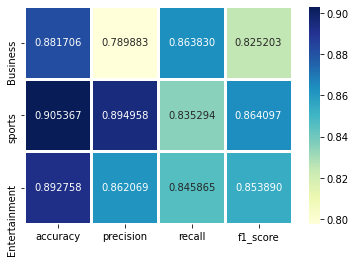

In [ ]:
accuracy,precision,recall,f1score=metrics(CF) #for  running model
CR={'accuracy':accuracy,'precision':precision,'recall':recall,'f1_score':f1score}
data=pd.DataFrame(CR)
#0 Business, 2 sports, 1 Entertainment
newdata=data.rename(index={0:'Business',1:'sports',2:'Entertainment'})
img=sb.heatmap(newdata,annot=True,fmt='f',robust=True,linewidths=2, cmap="YlGnBu")
img.figure.savefig('CB_25.png')

In [ ]:
np.mean(f1score) # for the running  model

0.8477301860632295

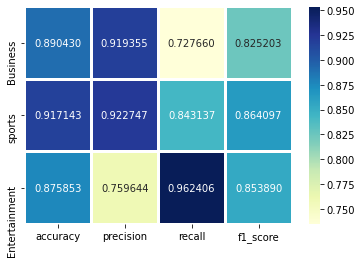

In [ ]:
accuracy,precision,recall,f1score=metrics(CF) #for  running model
CR={'accuracy':accuracy,'precision':precision,'recall':recall,'f1_score':f1score}
data=pd.DataFrame(CR)
#0 Business, 2 sports, 1 Entertainment
newdata=data.rename(index={0:'Business',1:'sports',2:'Entertainment'})
img=sb.heatmap(newdata,annot=True,fmt='f',robust=True,linewidths=2, cmap="YlGnBu")
img.figure.savefig('NLP_saved_model.png')

In [ ]:
np.mean(f1score) # for the saved  model

0.8477301860632295

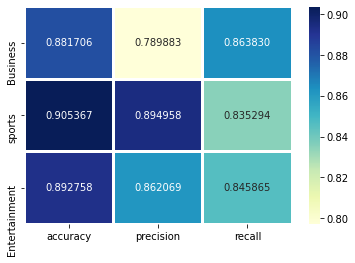

In [ ]:
accuracy,precision,recall=metrics(CF) #for  saved model
CR={'accuracy':accuracy,'precision':precision,'recall':recall}
data=pd.DataFrame(CR)
#0 Business, 2 sports, 1 Entertainment
newdata=data.rename(index={0:'Business',1:'sports',2:'Entertainment'})
img=sb.heatmap(newdata,annot=True,fmt='f',robust=True,linewidths=2, cmap="YlGnBu")
img.figure.savefig('CB_25.png')

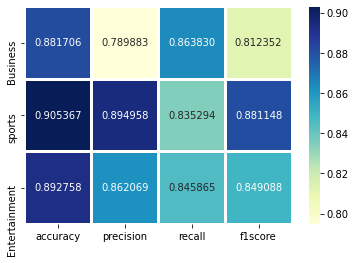

In [ ]:
accuracy,precision,recall,f1score=metrics(CF) #for  running model
CR={'accuracy':accuracy,'precision':precision,'recall':recall,'f1score':f1score}
data=pd.DataFrame(CR)
#0 Business, 1 sports, 2 Entertainment
newdata=data.rename(index={0:'Business',1:'sports',2:'Entertainment'})
img=sb.heatmap(newdata,annot=True,fmt='f',robust=True,linewidths=2, cmap="YlGnBu")
img.figure.savefig('Saved_model.png')

In [ ]:
#saved model is better

In [ ]:
mm.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 150)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 150, 50)           50000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 3)                

In [ ]:
df = pd.read_csv('../content/malayalam_news_test.csv',delimiter=',',encoding='utf_8_sig')
df.head()

,ID,headings
0,MAL_0001,അന്താരാഷ്ട്ര ഇന്റര്‍നെറ്റ് സേവനം താല്‍ക്കാലികമ...
1,MAL_0002,"മഞ്ഞ് ചതിച്ചാശാനേ!!!!, ഹാന്നോവറിന്റെ പ്രതീക്ഷക..."
2,MAL_0003,"12 സീസണ്‍ എട്ടു ചാമ്ബ്യന്മാര്‍, പ്രവചിക്കാന്‍ ..."
3,MAL_0004,\nമുംബൈ സിറ്റിയോടു തോറ്റിട്ടും യോഗ്യത നേടി ഗോവ...
4,MAL_0005,മദ്യപിച്ചെത്തിയ നടന്മാര്‍ തമ്മില്‍ കയ്യാങ്കളി;...


In [ ]:
df.count

<bound method DataFrame.count of             ID                                           headings
0     MAL_0001  അന്താരാഷ്ട്ര ഇന്റര്‍നെറ്റ് സേവനം താല്‍ക്കാലികമ...
1     MAL_0002  മഞ്ഞ് ചതിച്ചാശാനേ!!!!, ഹാന്നോവറിന്റെ പ്രതീക്ഷക...
2     MAL_0003  12 സീസണ്‍ എട്ടു ചാമ്ബ്യന്മാര്‍, പ്രവചിക്കാന്‍ ...
3     MAL_0004  \nമുംബൈ സിറ്റിയോടു തോറ്റിട്ടും യോഗ്യത നേടി ഗോവ...
4     MAL_0005  മദ്യപിച്ചെത്തിയ നടന്മാര്‍ തമ്മില്‍ കയ്യാങ്കളി;...
...        ...                                                ...
1255  MAL_1256  സാക്ഷാല്‍ വിരാട് കോഹ്ലിയെ പോലും ഞെട്ടിച്ച്‌ ജസ...
1256  MAL_1257  ചാമ്ബ്യന്‍സ് ലീഗ്; ബയേണിനെ തകര്‍ത്ത് ലിവര്‍പൂള...
1257  MAL_1258  20 രൂപയുടെ നാണയമിറക്കാന്‍ കേന്ദ്ര ധനകാര്യ മന്ത...
1258  MAL_1259  ഇന്ത്യന്‍ സമ്ബദ് വ്യവസ്ഥ 7.3 ശതമാനം വളര്‍ച്ച ന...
1259  MAL_1260  വൈ ദിസ് കൊലച്ചതി? ഒറ്റ രാത്രികൊണ്ട് ലക്ഷക്കണക്...

[1260 rows x 2 columns]>

In [ ]:
X_test=df.headings

In [ ]:
T_ind=df.ID

In [ ]:
T_ind

0       MAL_0001
1       MAL_0002
2       MAL_0003
3       MAL_0004
4       MAL_0005
          ...   
1255    MAL_1256
1256    MAL_1257
1257    MAL_1258
1258    MAL_1259
1259    MAL_1260
Name: ID, Length: 1260, dtype: object

In [ ]:
eval_sequences = tok.texts_to_sequences(X_val)
eval_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [ ]:
from keras.utils import to_categorical

In [ ]:
Y_train_=to_categorical(Y_train)

In [ ]:
Y_train_.shape

(4280, 3)

In [ ]:
X_=[]
for i in  X_test:
  X_.append(i.replace('\u200d',''))

In [ ]:
X__=[]
for i in  X_:
  X__.append(i.replace('\u200c',''))

In [ ]:
X_test=np.asarray(X__)

In [ ]:
X_test.shape

(1260,)

In [ ]:
eval_sequences = tok.texts_to_sequences(X_test)
eval_sequences_matrix = sequence.pad_sequences(eval_sequences,maxlen=max_len)

In [ ]:
S_label=np.argmax(mm.predict(eval_sequences_matrix),1)

In [ ]:
S_label.shape

(1260,)

In [ ]:
S_L=np.zeros_like(S_label)

In [ ]:
CR={'ID':T_ind,'Predicted_Labels':S_label}
data=pd.DataFrame(CR)

In [ ]:
data.head()

,ID,Predicted_Labels
0,MAL_0001,0
1,MAL_0002,0
2,MAL_0003,2
3,MAL_0004,2
4,MAL_0005,1


In [ ]:
newdata=data.rename(data.Predicted_Labels=={0:'Business',1:'Entertainment',2:'Sports'})

In [ ]:
newdata=data.replace({'Predicted_Labels': {0:'Business',1:'Entertainment',2:'Sports'}})

In [ ]:
data.head()

,ID,Predicted_Labels
0,MAL_0001,0
1,MAL_0002,0
2,MAL_0003,2
3,MAL_0004,2
4,MAL_0005,1


In [ ]:
newdata.head()

,ID,Predicted_Labels
0,MAL_0001,Business
1,MAL_0002,Business
2,MAL_0003,Sports
3,MAL_0004,Sports
4,MAL_0005,Entertainment


In [ ]:
newdata.to_csv('19015_Task_1_submission-1.csv')